## Analysis of an E-commerce Dataset Part 2

In [1]:
student_name = "Taha Naveed Shibli"
student_id = "47892641"

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ecommerce_ds = 'cleaned_ecommerce_dataset.csv'
ecommerce_df = pd.read_csv(ecommerce_ds)
print('show the length of the dataframe: ecommerce_df')
print(len(ecommerce_df))

show the length of the dataframe: ecommerce_df
2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
ecommerce_df.head(10) # Display the first 10 rows of the dataset

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
5,4081,100399,Good for sci-fi,Matrix,3.0,3.0,M,Movies,40,24.51,4
6,4081,100399,Scary? you bet!,Blair Witch Project,4.0,3.0,M,Movies,12,44.00,4
7,4081,101899,Fox - the 4th basic channel,FOX,4.0,4.0,M,Media,25,80.00,4
8,4081,112099,Amen!,Dogma,4.0,3.0,M,Movies,22,87.59,4
9,4081,122899,mama mia!,Olive Garden,4.0,3.0,M,Restaurants & Gourmet,49,32.00,4


In [4]:
ecommerce_df.info() # Display information about the dataset, including column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [5]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
categorical_features = ['gender', 'category', 'review']
ecommerce_df[categorical_features] = encoder.fit_transform(ecommerce_df[categorical_features])

In [6]:
correlations = ecommerce_df[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()
print(correlations) #Finding out all the corrleated features regarding rating

             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


# Explanation and Analysis on the correlations:

Correlation is a statistical measure that is used to quantify the relationship between two variables. It helps us in understanding how changes in one variable will help us in determining the changes in other variables.

1. The correlation coefficient between **helpfulness and rating** is -0.007523, which is close to 0. This indicates a very weak or no linear relationship between these two variables. It suggests that there is little to no impact of the helpfulness of a review on the rating assigned to it.

2. The correlation between **gender and rating** is -0.034337, which is also close to 0. This suggests a very weak or non-linear relationship between gender and rating. It indicates that the gender of the person giving review has a negligible influence on the rating given to a product.

3. The correlation between **category and rating** is -0.163158, which is closer to -1 than the previous correlations. This indicates a moderate negative correlation between category and rating. It suggests that the category of the product being reviewed has some impact on the assigned rating. It also means that the category and rating share an inverse relationship, i.e., if the value of one variable increases the other has to decrease.

4. The correlation between **review and rating** is -0.036118, which is more than the correlation coefficient between gender and rating. It suggests that the specific words or phrases used in the review has a some amount of influence on the rating given to a product. 

## Analysis on the correlations:

In order to figure out which are the most and least correlated features, we try to compare the values on a scale from -1 to 1. So, if the value of correlation is closer to -1 or 1 it is the most correlated values, Specifically speaking, values close to -1 indicate a strong negative correlation and values close to +1 indicate a strong positive correlation. On the contrary, if a value is closer to 0 then we can arrive to the conclusion that it is the least correlated value. And value 0 simply implies no correlation.

From the values generated above, here is my conclusion:

1. Category and review are the most correlated features. They will have a greater influence on the prediction.
2. Helpfulness and gender are the least correlated features. They won't have any significant influence on the accuracy of the prediction.


### Understanding how the correlation will affect the final prediction results.

1. Weak negative correlation between helpfulness and rating suggests little to no impact of the helpfulness of a review on the rating assigned to it. Including this feature in the regression model may not have an impact in the prediction accuracy for rating.

2. Weak correlation between gender and rating implies that the gender of the reviewer may not have a significant impact on the rating prediction. Including this feature in the model may not significantly improve the prediction results.

3. Moderate negative correlation between category and rating indicates that the category of the product being reviewed may have a notable effect on the predicted rating. Moreover, Including this feature in the model can enhance the prediction accuracy, especially if we have distinct rating patterns among a differrent product categories.

4. Moderate correlation between review and rating suggests that the specific words or phrases used in the review will have a reasonable influence on the rating prediction. Including this feature in the model may improve the prediction results.

Overall, considering the correlations, it seems that review and product category are the most informative features for predicting the rating. Gender and helpfulness itself may have less impact on the final rating prediction. 

However, it is important to note that correlation does not imply causation, and there may be other factors influencing the prediction results that are not captured by these correlations.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [7]:
from sklearn.model_selection import train_test_split

# Assuming that X contains the features and y contains the target variable i.e., rating
X = ecommerce_df[['helpfulness', 'gender', 'category', 'review']]
y = ecommerce_df['rating']

# Case 1: Training data containing 10% of the entire data
#test size will be 0.9
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.9, random_state=142)
print("Case 1:")
print("Shape of training set:",X_train_1.shape)
print("Shape of the test set:",X_test_1.shape)

Case 1:
Shape of training set: (268, 4)
Shape of the test set: (2417, 4)


In [8]:
# Assuming X contains the features and y contains the target variable i.e., rating
X = ecommerce_df[['helpfulness', 'gender', 'category', 'review']]
y = ecommerce_df['rating']

# Case 2: Training data containing 90% of the entire data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.1, random_state=142)

print("Case 2:")
print("Shape of the training set:",X_train_2.shape)
print("Shape of the test set:",X_test_2.shape)

Case 2:
Shape of the training set: (2416, 4)
Shape of the test set: (269, 4)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [9]:
#in this section we are supposed to build four models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_a = LinearRegression()
model_a.fit(X_train_1[['category', 'review']], y_train_1) #model-a using two most correlated input features.

model_b = LinearRegression()
model_b.fit(X_train_1[['helpfulness', 'gender']], y_train_1) #model-b using two least correlated input features.

model_c = LinearRegression()
model_c.fit(X_train_2[['category', 'review']], y_train_2) #model-c using two most correlated input features.

model_d = LinearRegression()
model_d.fit(X_train_2[['helpfulness', 'gender']], y_train_2) #model-d using two least correlated input features.

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [10]:
                                    #Performance of Model A
y_pred_a = model_a.predict(X_test_1[['category', 'review']])
mse_a = mean_squared_error(y_test_1, y_pred_a)
rmse_a = mse_a ** 0.5
print("Model A with 10% training data, most correlated features:")
print("MSE:", mse_a)
print("RMSE:", rmse_a)

Model A with 10% training data, most correlated features:
MSE: 1.7690740179517055
RMSE: 1.3300654186737229


In [11]:
                                    #Performance of Model B
y_pred_b = model_b.predict(X_test_1[['helpfulness', 'gender']])
mse_b = mean_squared_error(y_test_1, y_pred_b)
rmse_b = mse_b ** 0.5
print("Model B with 10% training data, least correlated features:")
print("MSE:", mse_b)
print("RMSE:", rmse_b)

Model B with 10% training data, least correlated features:
MSE: 1.8412549895856636
RMSE: 1.356928513071217


In [12]:
                                    #Performance of Model C
y_pred_c = model_c.predict(X_test_2[['category', 'review']])
mse_c = mean_squared_error(y_test_2, y_pred_c)
rmse_c = mse_c ** 0.5
print("Model C with 90% training data, most correlated features:")
print("MSE:", mse_c)
print("RMSE:", rmse_c)

Model C with 90% training data, most correlated features:
MSE: 1.7588975359805048
RMSE: 1.3262343442923294


In [13]:
                                    #Performance of Model D
y_pred_d = model_d.predict(X_test_2[['helpfulness', 'gender']])
mse_d = mean_squared_error(y_test_2, y_pred_d)
rmse_d = mse_d ** 0.5
print("Model D with 90% training data, least correlated features:")
print("MSE:", mse_d)
print("RMSE:", rmse_d)

Model D with 90% training data, least correlated features:
MSE: 1.8109460127732369
RMSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

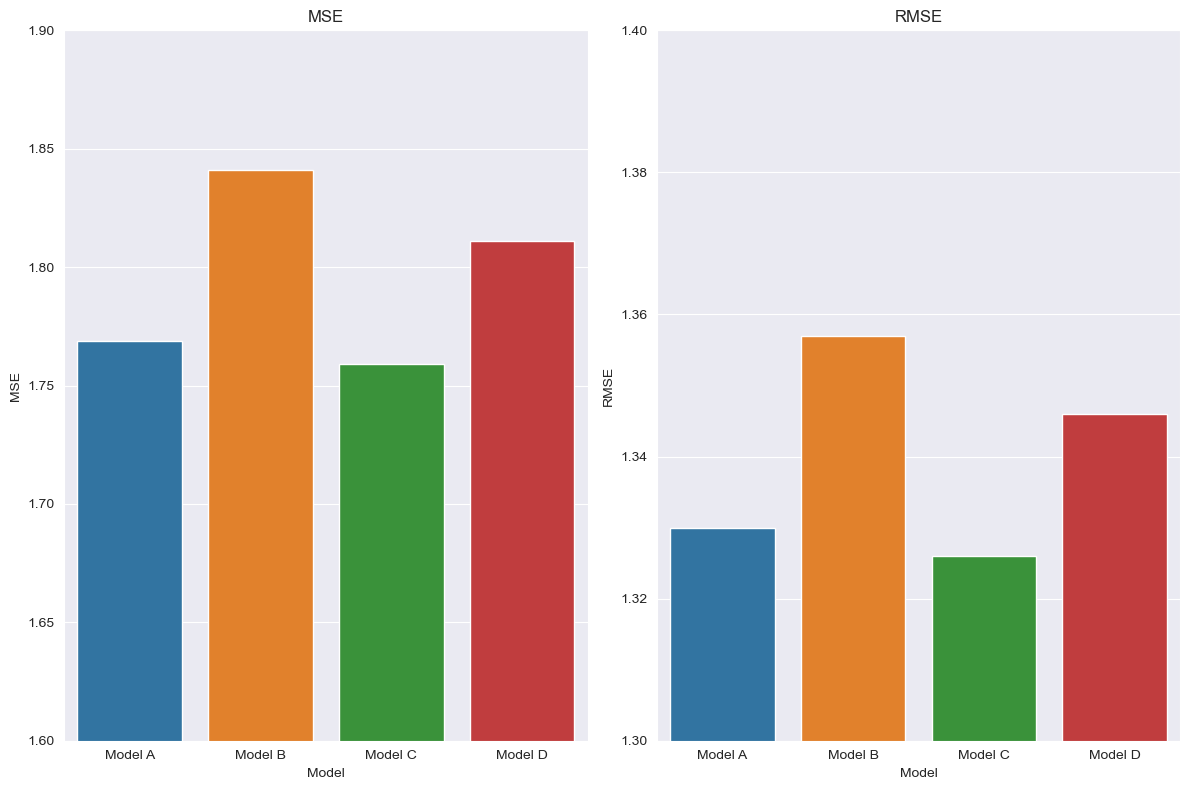

In [14]:
# Data for MSE and RMSE values rounded off to 3 dp.
mse_values = [1.769, 1.841, 1.759, 1.811]
rmse_values = [1.330, 1.357, 1.326, 1.346]
model_names = ['Model A', 'Model B', 'Model C', 'Model D']

data = {'Model': model_names, 'MSE': mse_values, 'RMSE': rmse_values}
model_df = pd.DataFrame(data)

# Set the style of the plot
sns.set_style("darkgrid")

# Bar plots for MSE and RMSE
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=model_df)
plt.title('MSE')
plt.ylim(1.6, 1.9)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=model_df)
plt.title('RMSE')
plt.ylim(1.3, 1.4)

# Show the plot
plt.tight_layout()
plt.show()

From the provided information, we can deduce that the models trained with the most correlated features and more training data (Model A and Model C) have lower values of both Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) compared to the models trained with the least correlated features and less training data (Model B and Model D). This is consistent with the expectation that models trained with more relevant features and more data tend to perform better.

*******************************************************************************************************************************
However, if this wasn't the case and Model A and Model C didn't perform better than Model B and Model D, then the possible reasons for these observations can include:

1. **Overfitting**: Models A and C can have overfit the training data due to the complexity introduced by using the most correlated features and the larger training data size. Overfitting can lead to poor generalization on unseen data, resulting in higher MSE and RMSE values.

2. **Relevance of the Feature**: The most correlated features used in Models A and C may not be the most informative or relevant features for the prediction task. Correlation does not necessarily imply causation, and using less correlated features that capture the underlying patterns in the data more effectively can lead to better performance.

3. **Quality of Data**: The quality and representativeness of the training data can have a significant impact on model performance. If the larger training data used in Models C and D contains noise, outliers, or irrelevant instances, it can negatively affect the model's performance.

It's crucial for a Data Analyst to carefully analyze and evaluate these factors to make informed decisions about feature selection, data preparation, and model training.